# Dimensionality Reduction

In this notebook, I'll deal with three Dimensionality Reduction technqiues:
1. Principal Component Analysis (Work on linear data)
2. Linear Discriminnt Analysis (Work on linear data)
3. Kernal PCA (Work on non-linear data)

I'll import the dataset for both PCA and LDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

I'll also create a method to plot the datapoints onto a 2-D Plot.

In [3]:
def plot(X, y, classifier, xlabel = 'PC1', ylabel = 'PC2', title = 'Dimensionality Reduction', colors = ('red', 'green', 'blue')):
    plt.figure(figsize = (20, 12))
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.4, cmap = ListedColormap(colors))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = [ListedColormap(colors)(i)], label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

## Principal Component Analysis (PCA)

### Scaling the data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

### Applying PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Let's extract the variance described by the two most valuable Principal Components
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394])

### Using Logistic Regression

In [6]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


### Visualization

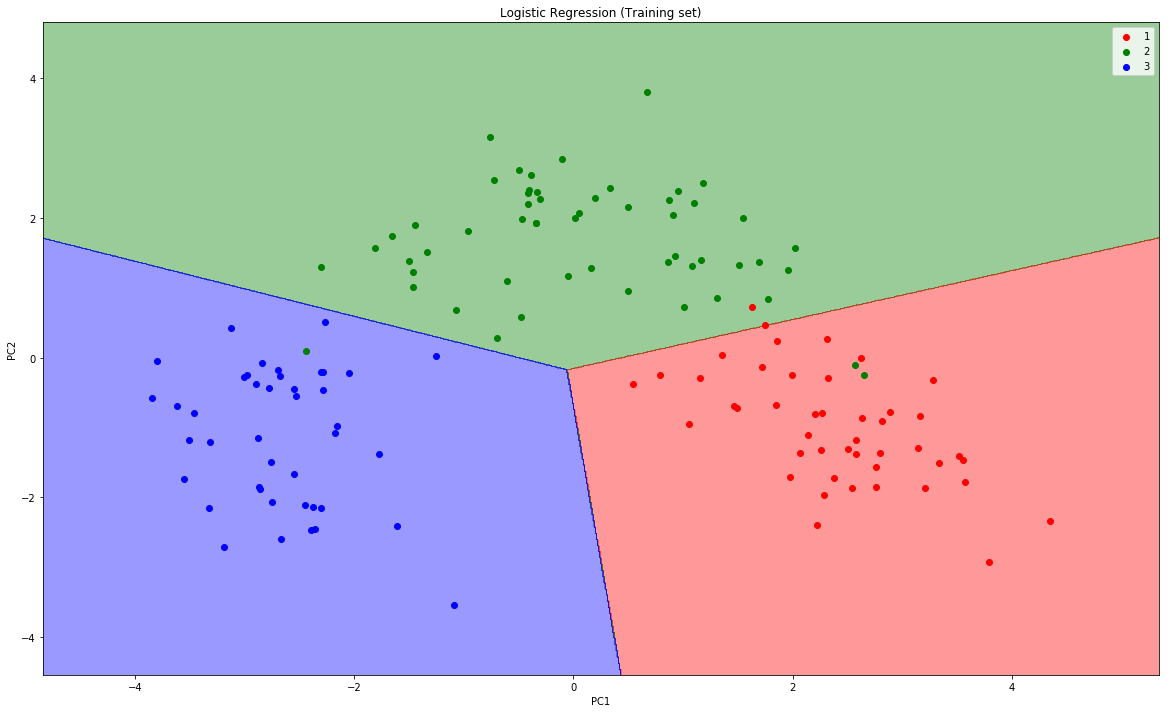

In [8]:
# Training Data
plot(X_train, 
     y_train, 
     classifier, 
     xlabel = 'PC1', 
     ylabel = 'PC2', 
     title = 'Logistic Regression (Training set)')

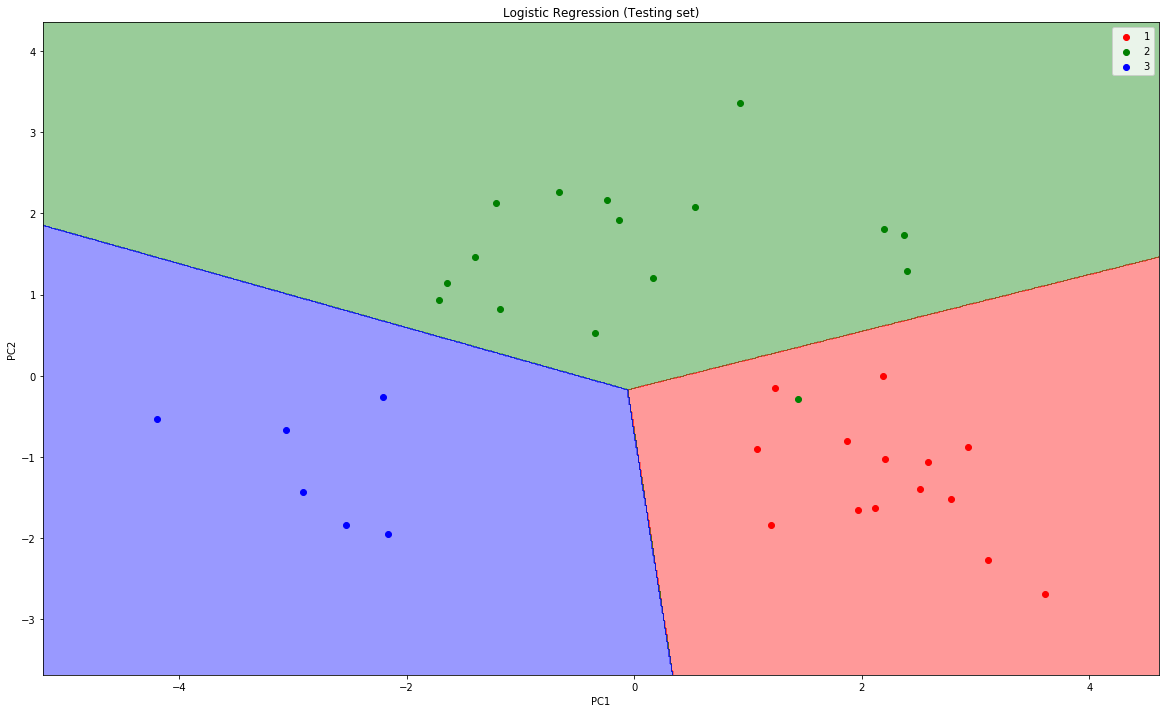

In [9]:
# Testing Data
plot(X_test, 
     y_test, 
     classifier, 
     xlabel = 'PC1', 
     ylabel = 'PC2', 
     title = 'Logistic Regression (Testing set)')

## Linear Discriminant Reduction

### Scaling the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

### Applying LDA

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Let's extract the variance described by the two most valuable Principal Components
explained_variance = lda.explained_variance_ratio_
explained_variance

array([0.73931691, 0.26068309])

### Using Logistic Regression

In [12]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


### Visualization

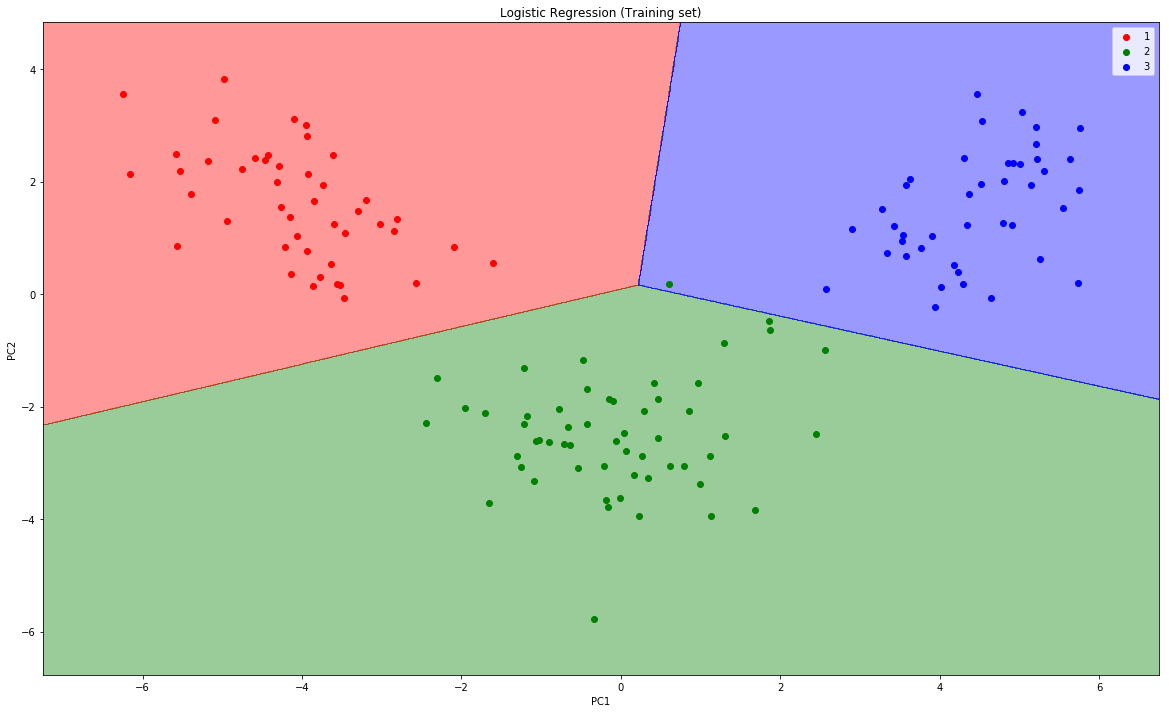

In [14]:
# Training Data
plot(X_train, 
     y_train, 
     classifier, 
     xlabel = 'PC1', 
     ylabel = 'PC2', 
     title = 'Logistic Regression (Training set)')

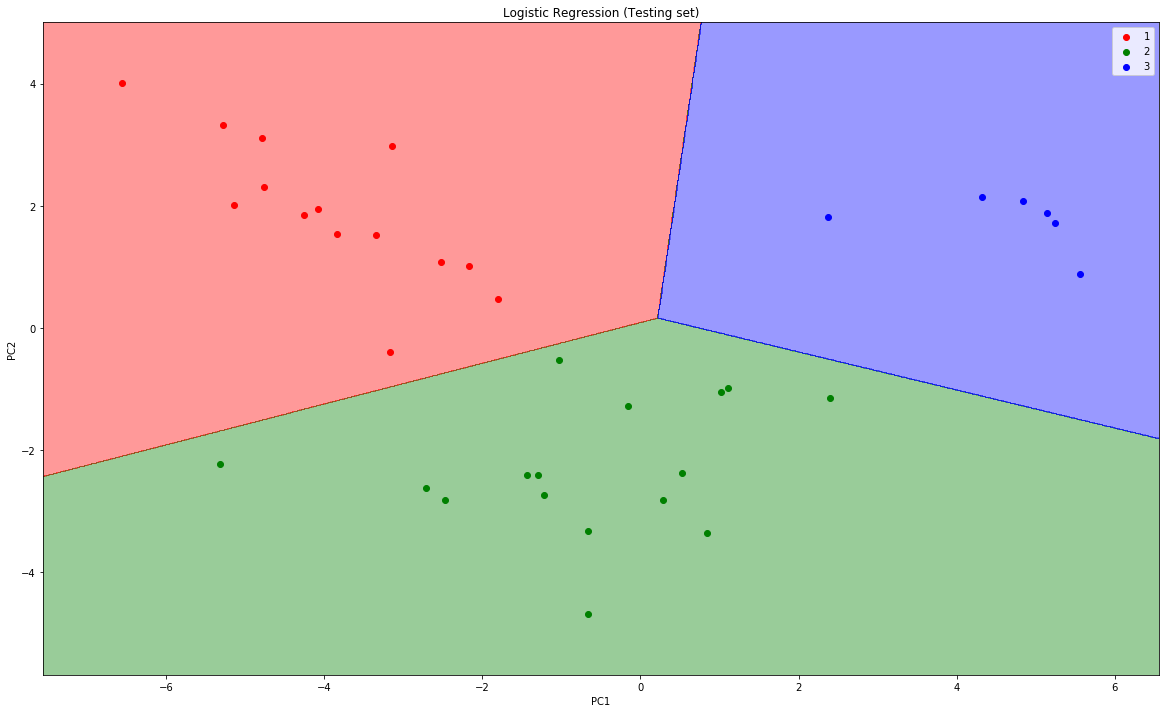

In [15]:
# Testing Data
plot(X_test, 
     y_test, 
     classifier, 
     xlabel = 'PC1', 
     ylabel = 'PC2', 
     title = 'Logistic Regression (Testing set)')

## Kernel PCA

We'll use the Social Network Ads dataset for Kernel PCA.

In [16]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:-1]
y = dataset.iloc[:, -1]

### Scaling the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

### Applying KernelPCA

In [18]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train, y_train)
X_test = kpca.transform(X_test)

### Using Logsitic Regression

In [19]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[54  4]
 [ 4 18]]


### Visualization

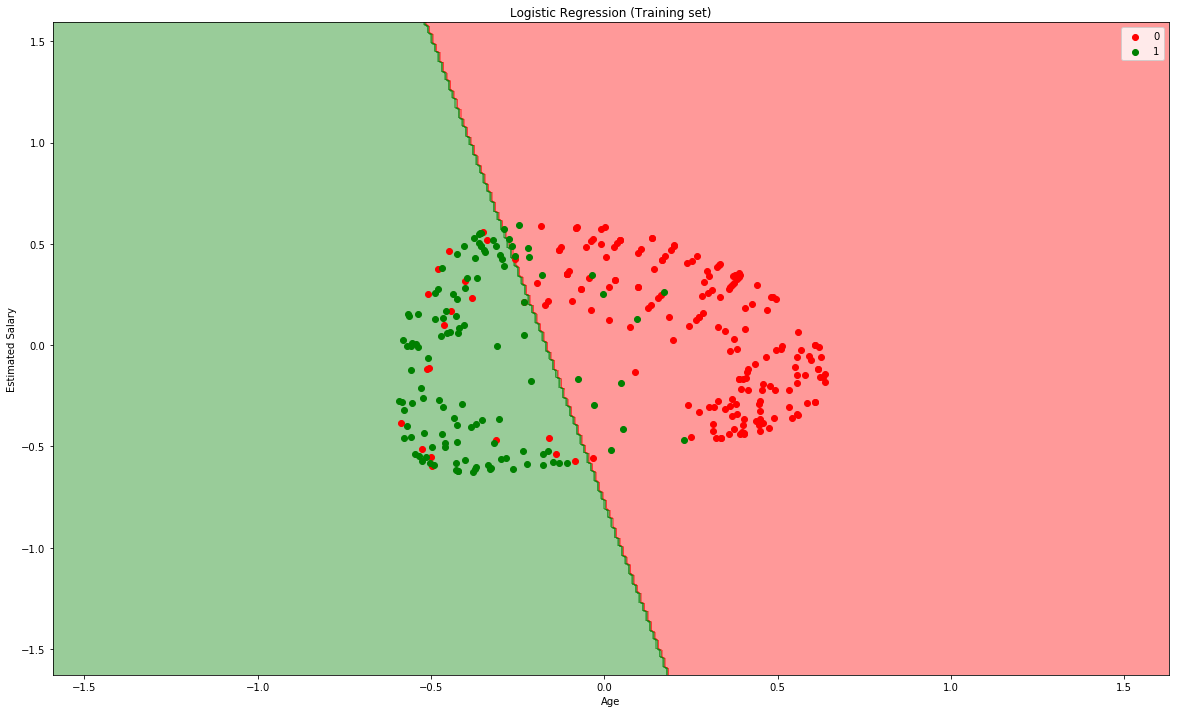

In [21]:
# Training Data
plot(X_train, 
     y_train, 
     classifier, 
     xlabel = 'Age', 
     ylabel = 'Estimated Salary', 
     title = 'Logistic Regression (Training set)', 
     colors = ('red', 'green'))

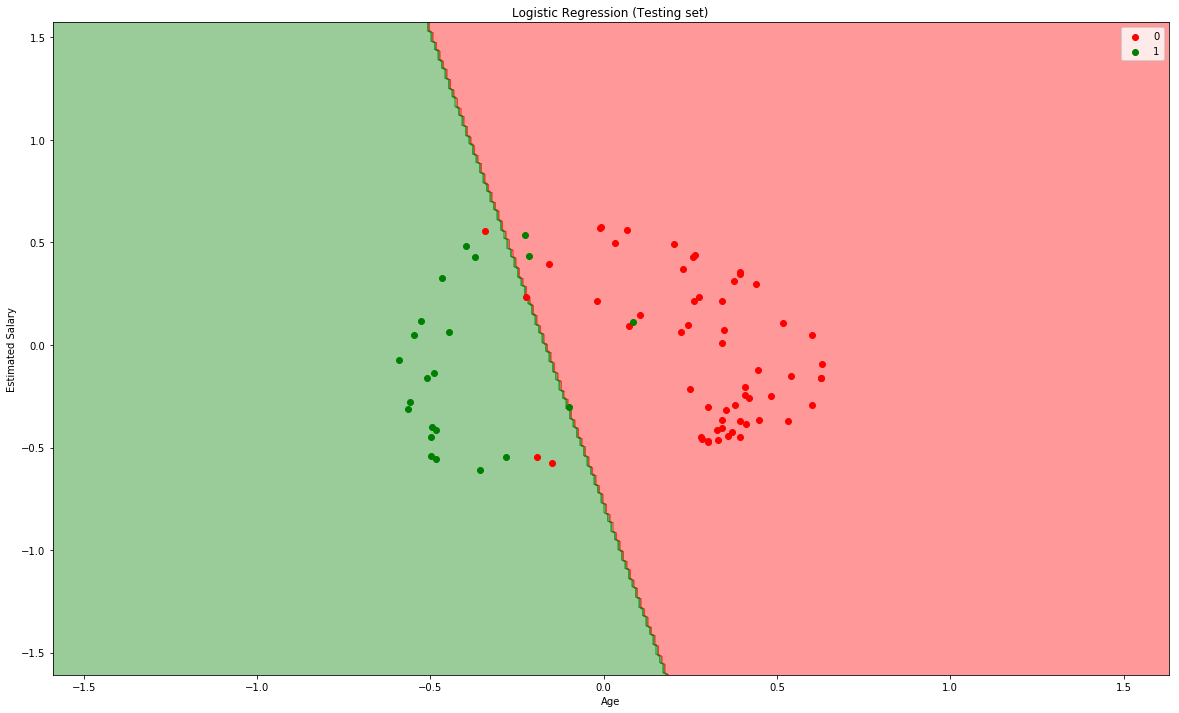

In [22]:
# Testing Data
plot(X_test, 
     y_test, 
     classifier, 
     xlabel = 'Age', 
     ylabel = 'Estimated Salary', 
     title = 'Logistic Regression (Testing set)', 
     colors = ('red', 'green'))